In [1]:
'''
    COMP 551 Assignment 1 Question 1
    Anil Gadddam
    260776846
'''
import numpy as np
import csv as csv
import matplotlib.pyplot as plt

In [2]:
#Setting up training data
data = []
result = []
filename = '.\Datasets\Dataset_1_train.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
for row in reader:
        data.append(float(row[0]))
        result.append(float(row[1]))


In [3]:
#Adding column of one's as the bias 
data_ones = np.ones((len(data)), dtype = np.float64).reshape(-1,1)
x = np.array(data).reshape(-1,1)
y = np.array(result)

In [4]:
#Design matrix with polynomial factor
poly_factor = 21
x_temp = x
for k in range(2,poly_factor):
        x_temp = np.hstack((x_temp,np.power(x,k)))
                     
x_train = np.hstack((data_ones,x_temp))

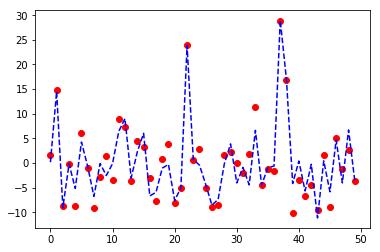

Text(0.5,1,u'Training Set Results')

In [5]:
#Calculating parameters using closed form 
xTx = x_train.T.dot(x_train)
XtX = np.linalg.inv(xTx)
XtX_xT = XtX.dot(x_train.T)
theta = XtX_xT.dot(y)

hypothesis = np.dot(x_train,theta)

mse_train = np.mean((y - hypothesis)**2)

#Plotting training set results
line1, = plt.plot(y,'ro',label="Labeled Output")
line2, = plt.plot(hypothesis,'b--',label="Predicted Output")
plt.show()
plt.xlabel('Data')
plt.ylabel('Result')
plt.legend(handles=[line1], loc=1)
plt.legend(handles=[line2], loc=2)
plt.title('Training Set Results')

In [7]:
#Setting up validation data
valid_data = []
valid_result = []
filename_valid = '.\Datasets\Dataset_1_valid.csv'
valid_raw_data = open(filename_valid, 'rt')
reader_valid = csv.reader(valid_raw_data, delimiter=',', quoting=csv.QUOTE_NONE)

for row in reader_valid:
    valid_data.append(float(row[0]))
    valid_result.append(float(row[1]))        

In [8]:
#Design matrix with columns of one's
x_valid = np.array(valid_data).reshape(-1,1)
y_valid = np.array(valid_result)
x_temp_valid = x_valid
for k in range(2,poly_factor):
     x_temp_valid = np.hstack((x_temp_valid,np.power(x_valid,k)))
                     
x_valid = np.hstack((data_ones,x_temp_valid))

In [9]:
#Calculation for hypothesis
hypothesis_valid = np.dot(x_valid,theta)

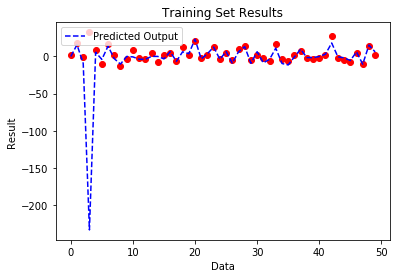

In [10]:
#Plotting results for validation set
plt.plot(y_valid,'ro')
line2, = plt.plot(hypothesis_valid,'b--',label="Predicted Output")
plt.show()
plt.xlabel('Data')
plt.ylabel('Result')
plt.title('Validation Set Results')
plt.legend(handles=[line2], loc=4)

In [11]:
# Calculating mean square error for validation set
mse_valid = np.mean((y_valid - hypothesis_valid)**2)
print mse_valid

1422.05475784


In [12]:
# Regularization 
mseTrainValues = []
mseValidValues = []
reg_term=np.identity(poly_factor)
reg_term[0][0] = 0
rangeOfregfactor = np.arange(0.0001,1,0.00001)
for value in rangeOfregfactor:
    xTx_temp = x_train.T.dot(x_train) + value*(reg_term)
    XtX_temp = np.linalg.inv(xTx_temp)
    XtX_xT_temp = XtX_temp.dot(x_train.T)
    thetaTemp = XtX_xT_temp.dot(y)
    hypothesisTrainValues = np.dot(x_train,thetaTemp)
    hypothesisValidValues = np.dot(x_valid,thetaTemp)
    mseTrainValues.append(np.mean((y - hypothesisTrainValues)**2))
    mseValidValues.append(np.mean((y_valid - hypothesisValidValues)**2))
    #print('*******Validation Set  lambda : %f, MSE) : %f' %(value,np.mean((y_valid - hypothesisValidValues)**2)))
 




In [13]:
xTx_test = x_valid.T.dot(x_valid) + 0.019520*(np.identity(poly_factor))
XtX_test = np.linalg.inv(xTx_test)
XtX_xT_test = XtX_test.dot(x_valid.T)
theta = XtX_xT_test.dot(y_valid) 

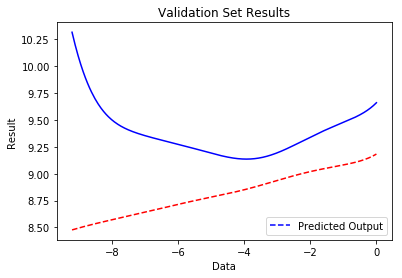

In [14]:
line1, = plt.plot(np.log(rangeOfregfactor),mseTrainValues,'r--',label = 'Training Result')
line2, = plt.plot(np.log(rangeOfregfactor),mseValidValues,'b-',label ='Validation Result')
plt.show()
plt.xlabel('log lambda')
plt.ylabel('MSE')
plt.legend([line1, line2], ["Training Result", "Validation Result"])

In [15]:
#Setting up training data
test_data = []
test_result = []
filename_test = '.\Datasets\Dataset_1_test.csv'
test_raw_data = open(filename_test, 'rt')
reader_test = csv.reader(test_raw_data, delimiter=',', quoting=csv.QUOTE_NONE)

for row in reader_test:
    test_data.append(float(row[0]))
    test_result.append(float(row[1]))

In [16]:
#Design matrix with polynomial factor
x_test = np.array(test_data).reshape(-1,1)
y_test = np.array(test_result)

x_temp_test = x_test
for k in range(2,poly_factor):
     x_temp_test = np.hstack((x_temp_test,np.power(x_test,k)))
                     
x_test = np.hstack((data_ones,x_temp_test))

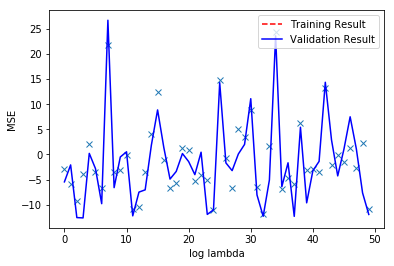

Text(0.5,1,u'Test Set Results')

In [17]:
# Closed form with lambda value for test set

hypothesis_test = np.dot(x_test,theta)

mse_test = np.mean((y_test - hypothesis_test)**2)

line4, =plt.plot(y_test,'x')
line5, = plt.plot(hypothesis_test,'b-',label = 'Predicted Output')
plt.show()
plt.xlabel('Data')
plt.ylabel('Result')
plt.legend([line4,line5], ['Labelled output','Predicted output'])
plt.title('Test Set Results')

In [18]:
x.shape

(50L, 1L)